In [1]:
# Importing all necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

# Predicting the Policy Amount

In [2]:
# Reading the CSV file
df = pd.read_csv("DS3_C6_S1_Regression_Insurance_Data_Project.csv")
df

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


In [3]:
# checking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [4]:
#Checking for null values
round(100*df.isnull().sum()/df.shape[0],2)

age         0.0
sex         0.0
bmi         0.0
classif     0.6
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [5]:
#Imputing null values
df['classif'].fillna(df['classif'].mode()[0],inplace=True)

In [6]:
# function for noise values in each categorical data

for cols in list(df.columns):
    print(round(df[cols].value_counts()))
    print("---------------------------")

 18     69
 19     67
 50     29
 20     29
 45     29
 48     29
 51     29
 52     29
 47     29
 46     29
 25     28
 22     28
 28     28
 53     28
 21     28
 54     28
 24     28
 26     28
 49     28
 27     28
 23     28
 42     27
 30     27
 41     27
 31     27
 29     27
 44     27
 43     27
 40     27
 56     26
 55     26
 32     26
 34     26
 57     26
 33     25
 39     25
 38     25
 36     25
 35     25
 59     25
 37     25
 58     23
 63     23
 62     23
 60     23
 61     22
 64     22
 0       2
-58      1
 190     1
-1       1
Name: age, dtype: int64
---------------------------
male      676
female    662
Name: sex, dtype: int64
---------------------------
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
---------------------------
OB1     395
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64

In [71]:
# replacing the noise values 
df['age'] = df['age'].replace([0],39)#replaced with mean
df['age'] = df['age'].replace([-58],58) # removed - sign
df['age'] = df['age'].replace([190],19) # replaced with 19
df['age'] = df['age'].replace([-1],39) # replaced with mean
# To replace this values we need domain knowledge.

In [72]:
round(df['age'].mean(),0)

39.0

In [73]:
#Checking the shape
df.shape

(1338, 8)

In [74]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.180867,30.663397,1.094918,13270.422265
std,14.026853,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [75]:
df1=df.copy()

In [76]:
#Feature Engineering

df1.sex=df1.sex.astype('category')
df1.classif=df1.classif.astype('category')
df1.smoker=df1.smoker.astype('category')
df1.region=df1.region.astype('category')

label_encoder = preprocessing.LabelEncoder()
df1['sex']=label_encoder.fit_transform(df1['sex'])
df1['classif']=label_encoder.fit_transform(df1['classif'])
df1['smoker']=label_encoder.fit_transform(df1['smoker'])
df1['region']=label_encoder.fit_transform(df1['region'])


In [77]:
df1.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

## Visualizations

### Univariate Analysis:

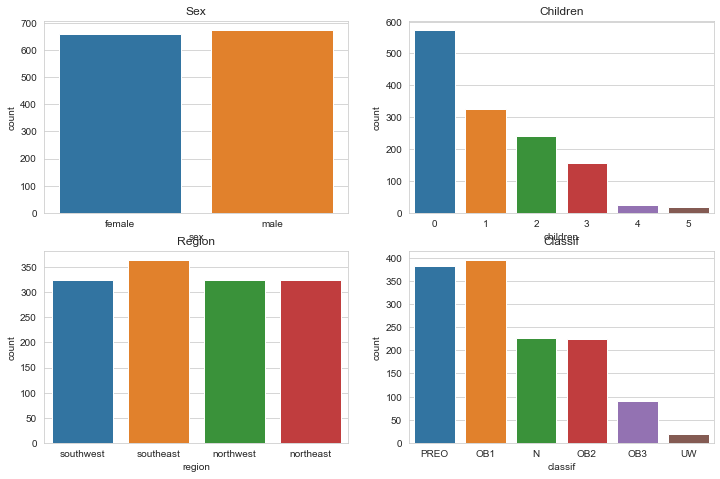

In [78]:
plt.figure(figsize=(12,12))
plt.subplot(321)
sns.countplot(data=df,x='sex')
plt.title("Sex")

plt.subplot(322)
sns.countplot(data=df,x='children')
plt.title("Children")

plt.subplot(323)
sns.countplot(data=df,x='region')
plt.title("Region")

plt.subplot(324)
sns.countplot(data=df,x='classif')
plt.title("Classif")
plt.show()

### Conclusion: 1)In the plot gender,males are in high count.
2)In the plot children we can observe that the patients with 0 children are high.
3)In the plot Region,we can observe that in the region southeast has highest count.
4)In the plot classif ,we can observe that the class PREO has the highest count of people.

<AxesSubplot:xlabel='charges', ylabel='Density'>

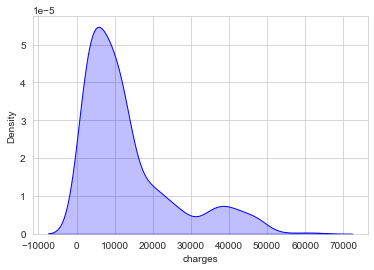

In [79]:
#Charges
sns.kdeplot(df['charges'],color='b',shade=True)

#### Here,we can observe the plot is right-skewed

### Bivariate Analysis:

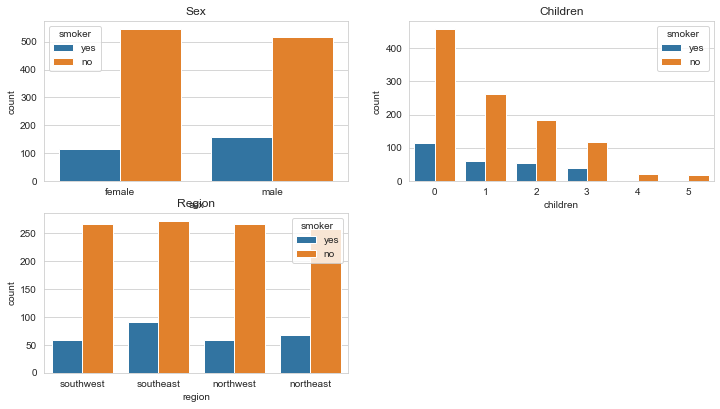

In [80]:
#Bivariate
plt.figure(figsize=(12,10))
plt.subplot(321)
sns.countplot(data=df,x='sex',hue='smoker')
plt.title("Sex")

plt.subplot(322)
sns.countplot(data=df,x='children',hue ='smoker')
plt.title("Children")

plt.subplot(323)
sns.countplot(data=df,x='region',hue='smoker')
plt.title("Region")



plt.show()

### Here,in the all plots we can observe that the non-smokers are high when comapred to smokers.

<AxesSubplot:xlabel='age', ylabel='count'>

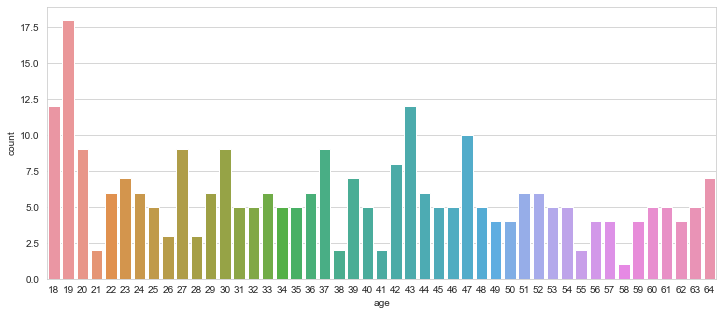

In [81]:
#Smokers on the basis of age
plt.figure(figsize=(12,5))
sns.countplot(x='age',data=df[(df.smoker=='yes')])

### Here,we can observe that the age group 0f 19 has the highest smoke rate and age 58 has the lowest smoke rate.

<AxesSubplot:xlabel='age', ylabel='count'>

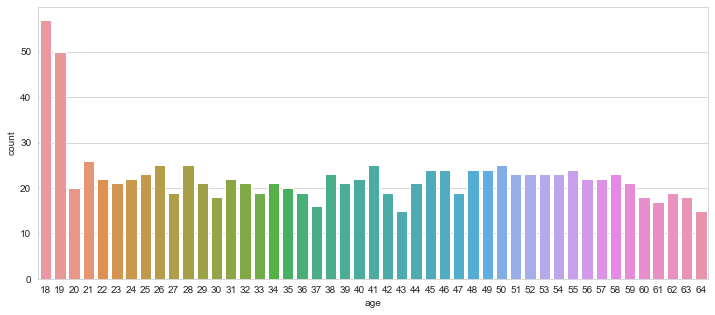

In [82]:
#Non-Smokers on the basis of age
plt.figure(figsize=(12,5))
sns.countplot(x='age',data=df[(df.smoker=='no')])

### By observing the plot,we can say that the age group 18 has highest non-smokers.

D:\python_software1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


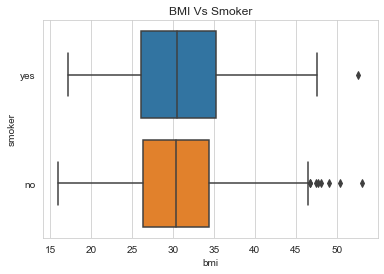

In [83]:
sns.boxplot(df['bmi'],df['smoker'])
plt.title("BMI Vs Smoker")
plt.show()

### Here,the distribution of smokers are high when comapred to non-smokers.

D:\python_software1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='charges'>

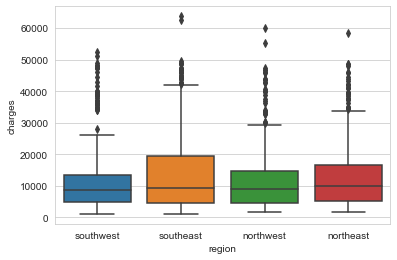

In [84]:
sns.boxplot(df['region'],df['charges'])

### Here,we can observe that the region southeast has the highest distribution of charges

## Multi-Variate Analysis:

D:\python_software1\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


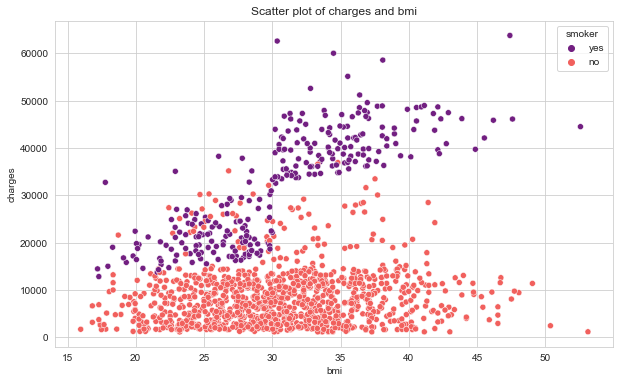

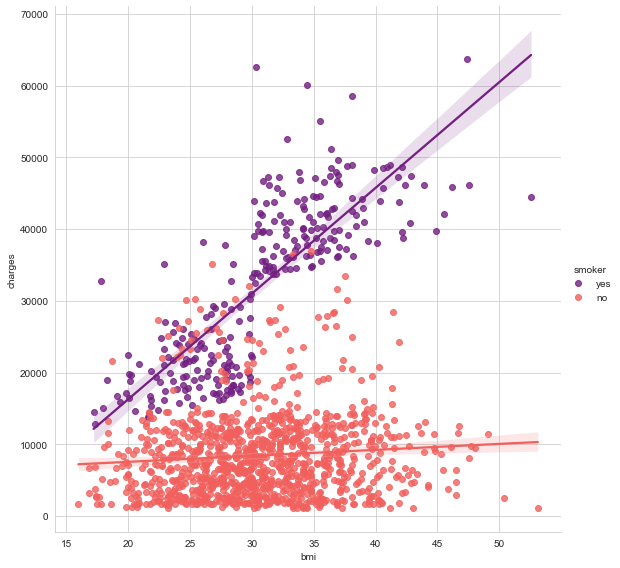

In [85]:
#charges vs smoker vs bmi
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)

#### Here,by observing the plot we can say that the smokers with high bmi are getting high charges.The non-smokers with high and low bmi are getting low charges

12


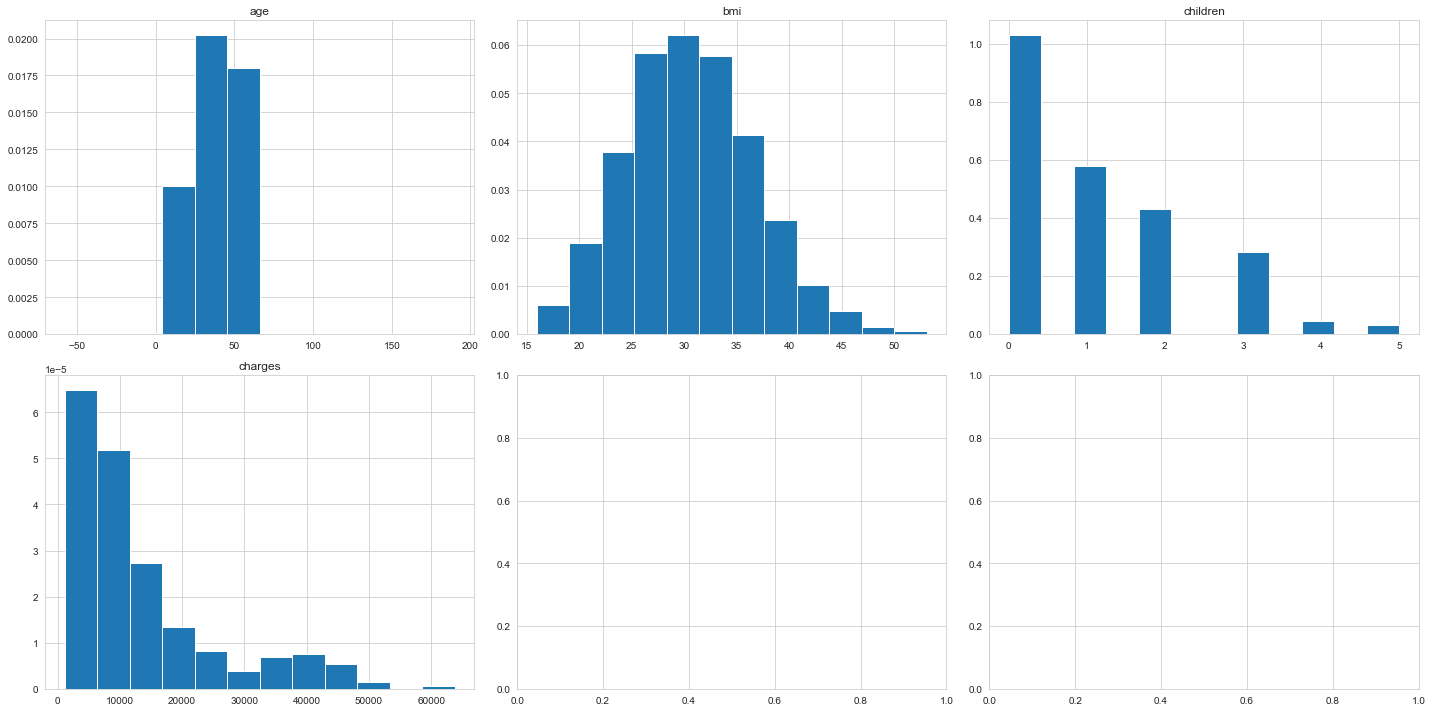

In [70]:
# Histogram for all numeric cols
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df.select_dtypes(include=numerics)
numeric_cols=new_df.columns
num_cols=3

#To decide on the bin size using Sturge’s rule
#bins=1+ceil(log2(n)) #research
  
bin_count = int(np.ceil(np.log2(len(new_df.axes[0]))) + 1)
n_bins = bin_count
print(n_bins)

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
 ax.hist(new_df[col],bins=n_bins,density=True)
 ax.set_title(col)
plt.show()

#### Here,we can see that the data was not normally distributed

In [86]:
#Feature Scaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df1.to_numpy()),columns=df1.columns)

In [87]:
corr = df1.corr()

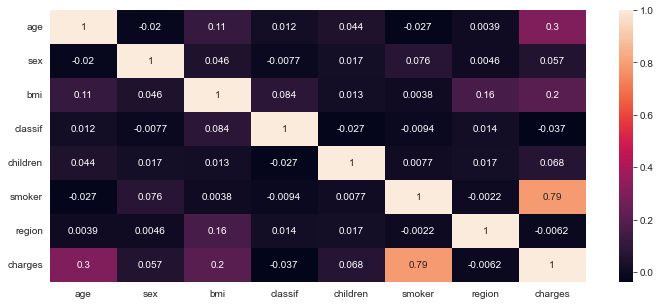

In [88]:
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)
plt.show()

In [89]:
#Ranking 
rank=pd.DataFrame(corr['charges']).reset_index()
rank.rename(columns={'index':'names','charges':'values'},inplace=True)
rank.sort_values(by='values',ascending=False,inplace=True)
rank

,names,values
7,charges,1.000000
5,smoker,0.787251
0,age,0.298306
2,bmi,0.198341
4,children,0.067998
1,sex,0.057292
6,region,-0.006208
3,classif,-0.036921


### Splitting of data

#### --->The target variable is "Charges"

In [90]:
x,y=scaled_df.iloc[:,:-1],scaled_df.iloc[:,-1]

In [91]:
#Splitting the data:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)
x_train.shape,y_train.shape

((936, 7), (936,))

In [92]:
x_test.shape,y_test.shape

((402, 7), (402,))

## Modelling:

### The choosen models are : 1)Linear Regression ,2)Decisontree, 3)Randomforest, 4)Adaboost, 5)Stacking

### Linear Regression:

#### --->Target = charges , -->feature = smoker

In [93]:
# Linear regression
x1,y1 = scaled_df[['smoker']],scaled_df['charges']

In [94]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=30)
x_train1.shape,y_train1.shape

((936, 1), (936,))

In [95]:
#Modelling
model_LR_1 = LinearRegression().fit(x_train1,y_train1)
print("Intercept :", model_LR_1.intercept_)# c-->y-intercept
print("Slope :", model_LR_1.coef_)  # m -->slope

Intercept : 0.11534810954503065
Slope : [0.37226068]


In [96]:
#R2 val
r2 = model_LR_1.score(x_train1,y_train1)
round(r2,2)

0.61

### Multi-linear regression with selected features:

In [97]:
#Independent var : bmi,smoker,region,classif,age

x2,y2 = scaled_df[['bmi', 'smoker','region','classif','age']],scaled_df['charges']

In [98]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.3,random_state=30)
x_train2.shape,y_train2.shape

((936, 5), (936,))

In [99]:
#Modelling
model_LR_2 = LinearRegression().fit(x_train2,y_train2)
print("Intercept :", model_LR_2.intercept_)# c-->y-intercept
print("Slope :", model_LR_2.coef_)  # m -->slope

Intercept : -0.03325919622711651
Slope : [ 0.19540265  0.37720643 -0.01176552 -0.03433203  0.19931025]


In [100]:
#R2 val
r_2 = model_LR_2.score(x_train2,y_train2)
round(r_2,2)

0.75

### Multi-Linear Regression: with all features

In [101]:
#Model : Multi Linear regression
model_LR = LinearRegression().fit(x_train,y_train)
print("Intercept :", model_LR.intercept_)# c-->y-intercept
print("Slope :", model_LR.coef_)  # m -->slope

Intercept : -0.038347902306922116
Slope : [ 0.19785536 -0.00224028  0.19445684 -0.03363856  0.03280916  0.37691826
 -0.01216632]


In [102]:
# R^2 Coeff of determination

coeff_det=model_LR.score(x_train,y_train)
round(coeff_det,2)

0.75

### Decision Tree Regression:

In [103]:
#Modelling :(Decision Tree regressor):
dtm = DecisionTreeRegressor(max_depth=4,
 min_samples_split=5,
 max_leaf_nodes=10)
dtm.fit(x_train,y_train)
print("R-Squared on train dataset :",round(dtm.score(x_train,y_train),2))
dtm.fit(x_test,y_test) 
print("R-Squaredon test dataset: ",round(dtm.score(x_test,y_test),2))

R-Squared on train dataset : 0.87
R-Squaredon test dataset:  0.86


### Cross Validation:

#### cross val : Linear Model

In [104]:
## cross val : Linear Model
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
kfolds = KFold(n_splits=10,shuffle=True,random_state=7)

score1 = cross_val_score(model_LR,x,y,scoring='r2',cv=kfolds)
print(round(score1.mean(),2))

0.75


#### cross val : Decisiontreeregressor

In [105]:
## cross val : Decisiontreeregressor

score1 = cross_val_score(dtm,x,y,scoring='r2',cv=kfolds)
print(round(score1.mean(),2))

0.85


#### Grid search view for random forest

In [106]:
# Hyperparameter tuning
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
 param_grid=params,
 cv = 4,
 n_jobs=-1, verbose=1, scoring="r2")

In [109]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 2.39 s
Wall time: 48.8 s


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [111]:
grid_search.best_score_

0.8622547463243588

In [112]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_jobs=-1,
                      random_state=42)

#### CV of Random forest model

In [113]:
# Cross val : Random forest model
model_RF = RandomForestRegressor(max_depth=5,min_samples_leaf=5,n_jobs=-1,random_state=42)
model_RF.fit(x_train,y_train)
#Evaluate the model

RF_score = cross_val_score(model_RF,x,y,scoring='r2',cv=kfolds,n_jobs=-1,error_score='raise')
print(RF_score)
print("r2 value :",round(RF_score.mean(),2))

[0.8331539  0.88409452 0.84559668 0.88091344 0.87960628 0.82939728
 0.90572774 0.84485703 0.81718288 0.88827383]
r2 value : 0.86


#### Cv of Adaboost

In [114]:
from sklearn.ensemble import AdaBoostRegressor

In [115]:
# define the model
model_AB = AdaBoostRegressor()
# evaluate the model

n_scores_AB = cross_val_score(model_AB, x, y, scoring='r2', cv=kfolds, n_jobs=-1, error_score='raise')

# report performance
print("R2 value:", round(n_scores_AB.mean(),2))


R2 value: 0.82


In [116]:
# required Python libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

In [117]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('RF', RandomForestRegressor()))
    level0.append(('DT', DecisionTreeRegressor()))
    level0.append(('LR', LinearRegression()))

# define meta learner model
    level1 = LinearRegression()
# define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=3)
    return model


#### CV of Stacking Algorithm

In [118]:
# cross Val : Stacking
model_ST = get_stacking()
# evaluate the model

n_scores_ST = cross_val_score(model_ST, x, y, scoring='r2', cv=kfolds, n_jobs=-1, error_score='raise')

print("R2 Value :",round(n_scores_ST.mean(),2))

R2 Value : 0.84


#### Here,the best model according to r2 values is "Random Forest Model".So,the model is evaluated in in next step.

#### Model Evaluation:

In [119]:
# evaluate the model

y_predict=model_RF.predict(x_test) # ycap

#### Error Calculation:

In [120]:
# Error cal
#-->MSE,MAE,RMSE

MSE=mean_squared_error(y_test,y_predict)
MAE=mean_absolute_error(y_test,y_predict)
RMSE=mean_squared_error(y_test,y_predict,squared=False)
print("MSE :", round(MSE,2))
print("MAE :", round(MAE,2))
print("RMSE :", round(RMSE,2))

MSE : 0.01
MAE : 0.04
RMSE : 0.08


In [121]:
test_df = pd.DataFrame()
test_df['Y_test']=y_test
test_df['Y_pred']=y_predict
test_df

,Y_test,Y_pred
338,0.651208,0.683078
620,0.040503,0.065227
965,0.057854,0.075344
128,0.504598,0.258526
329,0.128059,0.208244
...,...,...
659,0.211857,0.207089
893,0.687658,0.718525
584,0.001930,0.017434
1290,0.095964,0.114044


D:\python_software1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y_test', ylabel='Y_pred'>

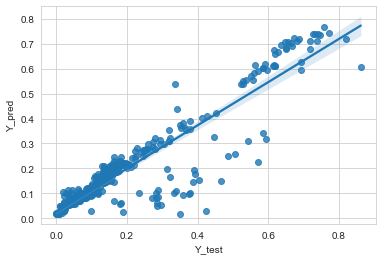

In [122]:
sns.set_style('whitegrid')
sns.regplot(test_df['Y_test'],test_df['Y_pred'],data=test_df)

In [123]:
final_df = pd.DataFrame()

In [124]:
final_df['Models']=['LR','DT','RFM','AB','STACKING']
final_df['C_V_Score']=['0.75','0.85','0.86','0.82','0.84']

In [125]:
final_df # Cross val scores of all algorithms

,Models,C_V_Score
0,LR,0.75
1,DT,0.85
2,RFM,0.86
3,AB,0.82
4,STACKING,0.84


In [ ]:
#-->LR = Linear regression
#-->DT = Decision Tree Regressor
#-->RFM = Random Forest Model
#-->AB = Adaboost
#-->Stacking = stcking algorithm

### Final Conclusion:
### Here,by observing the cross validation score we can conclude that "Random Forest Model" would be the best model to predict the data the insurance policy